In [4]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

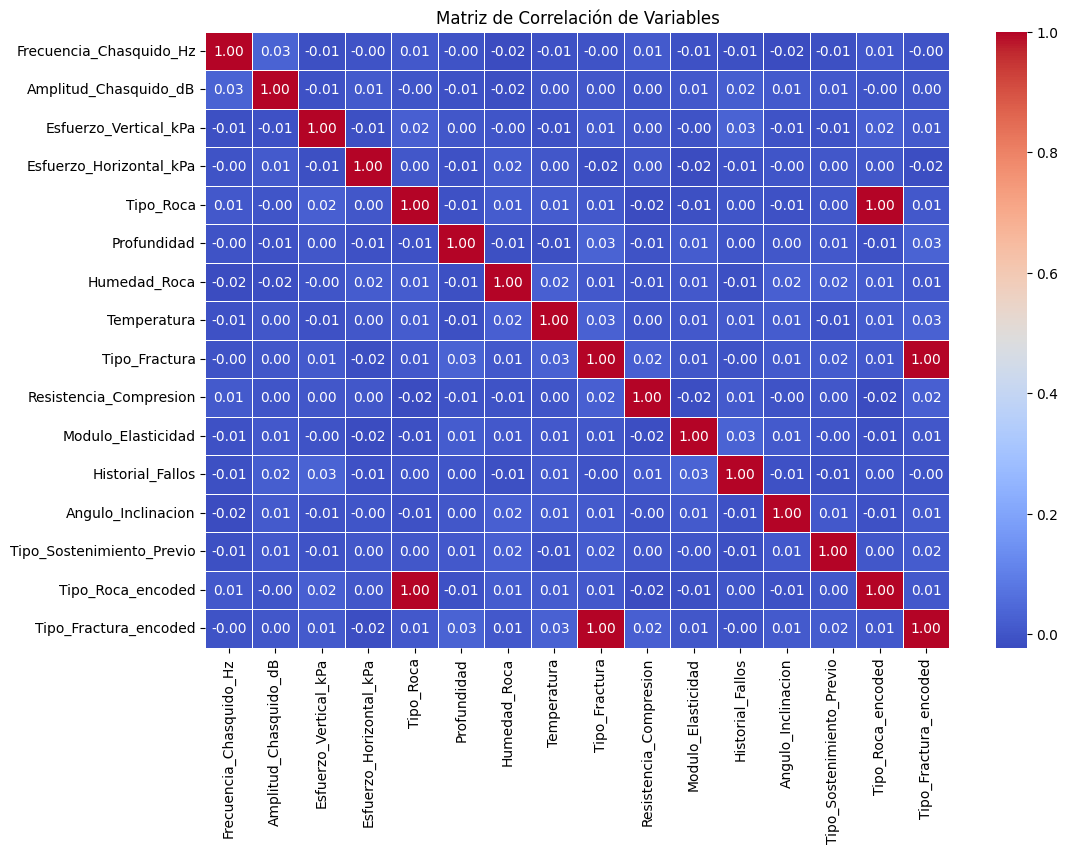

Archivo CSV con características significativas guardado como 'datos_entradas_red_neuronal.csv'


In [6]:
# Simulación de datos (deberías tener tus propios datos)
np.random.seed(42)

n = 5000  # Número de muestras

# Simulando un DataFrame con las nuevas características
df = pd.DataFrame({
    'Frecuencia_Chasquido_Hz': np.random.randint(75, 100, size=n),
    'Amplitud_Chasquido_dB': np.random.randint(900, 1100, size=n),
    'Esfuerzo_Vertical_kPa': np.random.uniform(200, 250, size=n),
    'Esfuerzo_Horizontal_kPa': np.random.uniform(150, 200, size=n),
    'Tipo_Roca': np.random.choice([1, 2, 3], size=n),  # Valores codificados (1: Granito, 2: Limestone, 3: Shale)
    'Profundidad': np.random.uniform(1500, 4000, size=n),
    'Humedad_Roca': np.random.uniform(20, 40, size=n),
    'Temperatura': np.random.uniform(35, 45, size=n),
    'Tipo_Fractura': np.random.choice([3, 5], size=n),  # Valores codificados (3: Fractura Baja, 5: Fractura Alta)
    'Resistencia_Compresion': np.random.uniform(100, 150, size=n),
    'Modulo_Elasticidad': np.random.uniform(40, 50, size=n),
    'Historial_Fallos': np.random.choice([0, 1], size=n),
    'Angulo_Inclinacion': np.random.uniform(0, 45, size=n),
    'Tipo_Sostenimiento_Previo': np.random.choice([0, 1, 2, 3], size=n)
})
df_1 = pd.DataFrame()
df_1['Tipo_Sostenimiento'] = np.random.choice([0, 1, 2, 3], size=n)

# Codificación de variables categóricas
label_encoder = LabelEncoder()
df['Tipo_Roca_encoded'] = label_encoder.fit_transform(df['Tipo_Roca'])
df['Tipo_Fractura_encoded'] = label_encoder.fit_transform(df['Tipo_Fractura'])

# Correlación de las características numéricas
correlation_matrix = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables')
plt.show()

# Umbral de correlación para seleccionar variables (puedes ajustar este valor)
umbral_correlacion = 0.2

# Seleccionar las características con correlación significativa (> umbral)
significant_features = correlation_matrix.columns[abs(correlation_matrix).gt(umbral_correlacion).any()]

# Filtrar las columnas del DataFrame con las características significativas
df_significant = df[significant_features]
df_significant['Tipo_Sostenimiento'] = df_1['Tipo_Sostenimiento']
# Guardar el DataFrame filtrado (con las variables significativas) en un archivo CSV
df_significant.to_csv(r'C:\Users\DAVID\Desktop\MECANICA_ROCAS_FREEFEM\MODELO_PREDICCION_SOSTENIMIENTO\DATA\datos_red_neuronal.csv', index=False)

# Confirmar que el archivo se guardó correctamente
print("Archivo CSV con características significativas guardado como 'datos_entradas_red_neuronal.csv'")
